In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns
import numpy as np
import networkx as nx

from sklearn import preprocessing

In [4]:
import privtree
import khist

In [3]:
A = np.random.normal(loc=1, scale=0.1, size=50)
A = np.r_[A, np.random.normal(loc=5, scale=3, size=50)].reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
A = scaler.fit_transform(A)

In [69]:
eps = 1.0
myprivtree = privtree.PrivTree(A, eps)
myprivtree.partition()
G = myprivtree.naive_est()

3.0 0 2.0794415416798357


In [84]:
leaves = privtree.get_leaves(G)
print(f'# leaves: {len(leaves)}')
khist_A = np.array([leaf.var.value for leaf in leaves])
khist_A = khist_A / khist_A.sum()
khist_B = np.array([leaf.ub[0] - leaf.lb[0] for leaf in leaves])

k = 5
X, dp = khist.solve_khist(khist_A, khist_B, k)

# leaves: 21


Text(0.5, 0, 'Data Support')

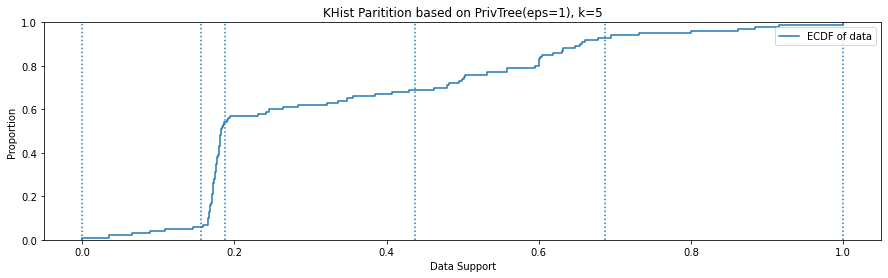

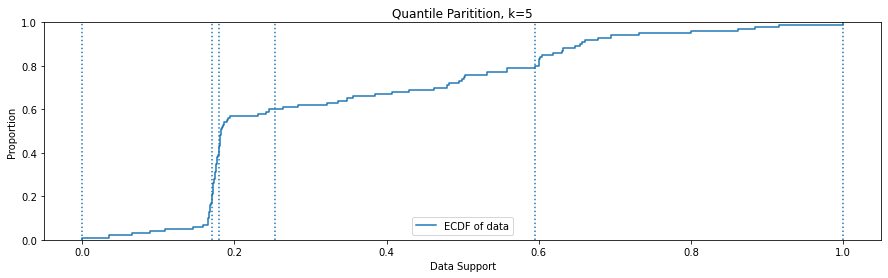

In [85]:
S = np.cumsum(X)
P = np.r_[0, np.cumsum(khist_B)[S-1]]

fig, ax = plt.subplots(figsize=(15, 4))
sns.ecdfplot(A, label='ECDF of data')

for p in P:
    ax.axvline(p, ls=':')
ax.legend()
    
ax.set_title(f'KHist Paritition based on PrivTree(eps=1), k={k}')
ax.set_xlabel('Data Support')

fig, ax = plt.subplots(figsize=(15, 4))
sns.ecdfplot(A, label='ECDF of data')

P = np.quantile(A, np.linspace(0,1,k+1))
for p in P:
    ax.axvline(p, ls=':')
ax.legend()
    
ax.set_title(f'Quantile Paritition, k={k}')
ax.set_xlabel('Data Support')